In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import sys

In [ ]:
## Mount Google drive folder if running in Colab
if('google.colab' in sys.modules):
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)
    DIR = '/content/drive/MyDrive/Colab Notebooks/OddSem2024/ALA'
    DATA_DIR = DIR+'/Data/'
else:
    DATA_DIR = 'Data/'

Mounted at /content/drive


In [ ]:
df = DATA_DIR + 'heptathlon.csv'
df = pd.read_csv(df)

index_col = 0

In [ ]:
df['sprint'] = np.where((df['run200m'] > df['run200m'].quantile(0.75)) &
                        (df['run800m'] > df['run800m'].quantile(0.75)),
                        'fast', 'slow')


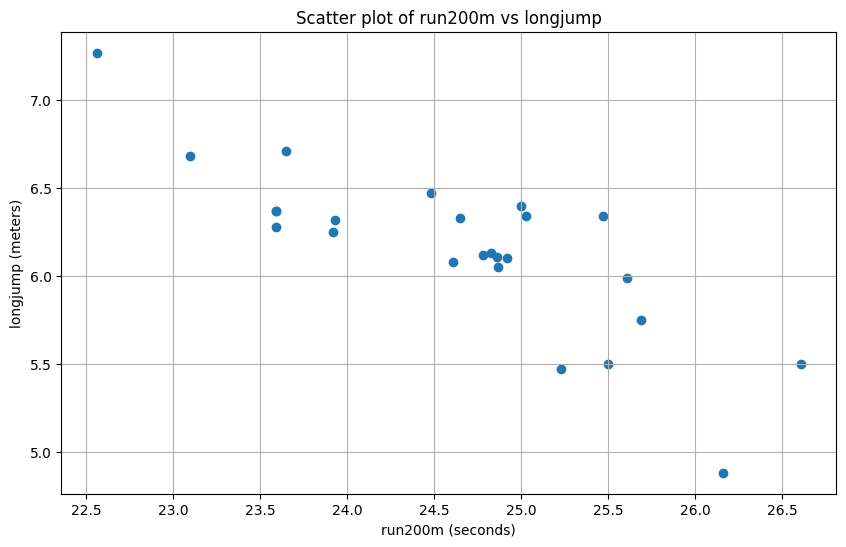

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['run200m'], df['longjump'])
plt.title('Scatter plot of run200m vs longjump')
plt.xlabel('run200m (seconds)')
plt.ylabel('longjump (meters)')
plt.grid()
plt.show()



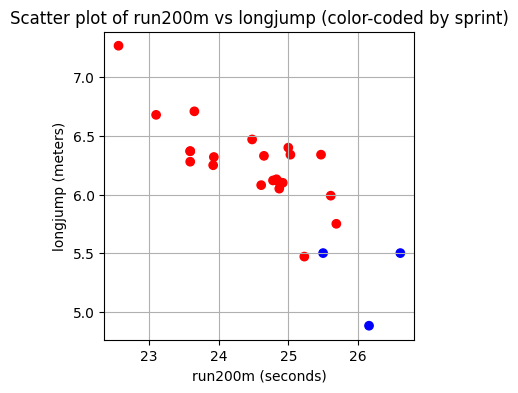

In [ ]:
plt.figure(figsize=(4,4))
colors = {'fast': 'blue', 'slow': 'red'}
plt.scatter(df['run200m'], df['longjump'], c=df['sprint'].map(colors))
plt.title('Scatter plot of run200m vs longjump (color-coded by sprint)')
plt.xlabel('run200m (seconds)')
plt.ylabel('longjump (meters)')
plt.grid()
plt.show()



In [ ]:
correlation = df['run200m'].corr(df['longjump'])
print("Pearson's correlation:", correlation)



Pearson's correlation: -0.8172052997012641


In [ ]:

features = df[['hurdles', 'highjump', 'shot', 'run200m', 'longjump', 'javelin', 'run800m']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

pca = PCA()
pca.fit(scaled_features)



PCA()

In [ ]:
pc_weights = pd.DataFrame(pca.components_, columns=features.columns)
print("PCA Component Weights:\n", pc_weights)

max_run200m_weight = pc_weights.iloc[:, 0].abs().idxmax()
max_longjump_weight = pc_weights.iloc[:, 0].abs().idxmax()
second_pc_max_javelin = pc_weights.iloc[1].abs().idxmax() == 'javelin'
least_weight_feature = pc_weights.iloc[0].abs().idxmin()

print(max_run200m_weight)
print(max_longjump_weight)
print(second_pc_max_javelin)
print(least_weight_feature)

PCA Component Weights:
     hurdles  highjump      shot   run200m  longjump   javelin   run800m
0 -0.452871  0.377199  0.363072 -0.407895  0.456232  0.075409 -0.374959
1  0.157921 -0.248074  0.289407 -0.260385 -0.055874  0.841692  0.224490
2  0.045150 -0.367779  0.676189 -0.083592  0.139317 -0.471560  0.395857
3 -0.026539  0.679992  0.124317  0.361066  0.111292  0.120799  0.603411
4  0.094948  0.018799  0.511652  0.649834 -0.184298  0.135107 -0.504321
5  0.783341  0.099400 -0.050860 -0.024956  0.590210 -0.027241 -0.155555
6 -0.380247 -0.433931 -0.217625  0.453385  0.612064  0.172947  0.098310
5
5
True
javelin
